<a href="https://colab.research.google.com/github/td-iceman/Tarandeep-Projects/blob/main/Tensorflow/cifar10/cifar10_deepnet1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10

In [2]:
tf.version.VERSION

'2.8.2'

In [3]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [4]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
X_train.shape

(50000, 32, 32, 3)

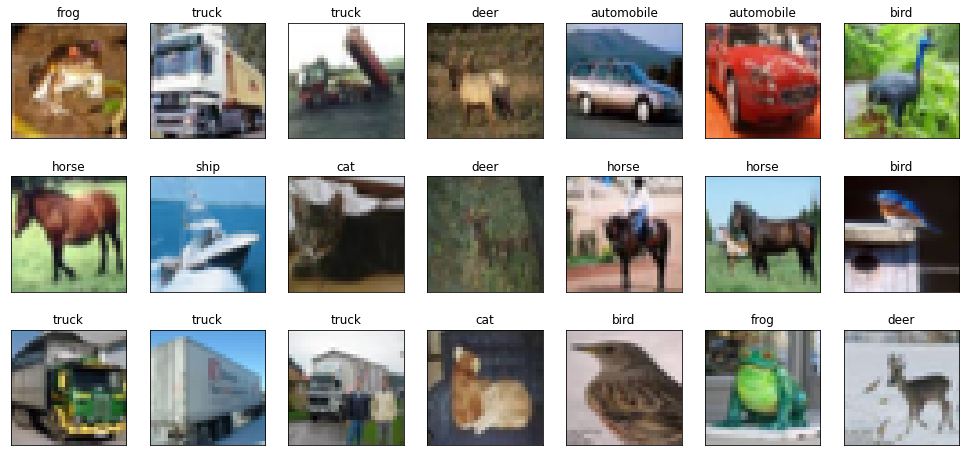

In [5]:
fig, axes = plt.subplots(ncols=7, nrows=3, figsize=(17, 8))
index = 0
for i in range(3):
    for j in range(7):
        axes[i,j].set_title(labels[y_train[index][0]])
        axes[i,j].imshow(X_train[index])
        axes[i,j].get_xaxis().set_visible(False)
        axes[i,j].get_yaxis().set_visible(False)
        index += 1
plt.show()

In [50]:
## -- Creating CNN model using TF functional API --

# -- input layer
in_put = tf.keras.Input(shape=(32,32,3), name='input_layer')

# -- 2D conv layer 1
im_conv = tf.keras.layers.Conv2D( name='conv1',
    filters=16,
    kernel_size=3,
    activation='relu',
    padding='same'
)(in_put)
# -- 2D conv layer 1a
im_conv1a = tf.keras.layers.Conv2D( name='conv1a',
    filters=32,
    kernel_size=3,
    activation='relu',
)(im_conv)
# -- max pooling layer 1
pool1 = tf.keras.layers.MaxPool2D( name='pool1',
    pool_size=(2, 2),
)(im_conv1a)

# -- 2D conv layer 2
im_conv2 = tf.keras.layers.Conv2D( name='conv2',
    filters=32,
    kernel_size=3,
    activation='relu',
    padding='same'
)(pool1)
# -- 2D conv layer 2a
im_conv2a = tf.keras.layers.Conv2D( name='conv2a',
    filters=64,
    kernel_size=3,
    activation='relu',
)(im_conv2)
# -- max pooling layer 2
pool2 = tf.keras.layers.MaxPool2D( name='pool2',
    pool_size=(2, 2),
)(im_conv2a)

# -- 2D conv layer 3
im_conv3 = tf.keras.layers.Conv2D( name='conv3',
    filters=64,
    kernel_size=3,
    activation='relu',
    padding='same'
)(pool2)
# -- 2D conv layer 3a
im_conv3a = tf.keras.layers.Conv2D( name='conv3a',
    filters=128,
    kernel_size=3,
    activation='relu',
)(im_conv3)
# -- max pooling layer 3
pool3 = tf.keras.layers.MaxPool2D( name='pool3',
    pool_size=(2, 2),
)(im_conv3a)


# -- dense layers
flat = tf.keras.layers.Flatten(name='flat1')(pool3)
a = tf.keras.layers.Dense(200, activation='relu', name='dense1')(flat)
b = tf.keras.layers.Dense(80, activation='relu', name='dense2')(a)
output = tf.keras.layers.Dense(10, activation='softmax', name='output_layer')(b)

model = tf.keras.Model(in_put, output)

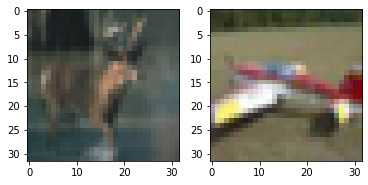

In [52]:
## -- creating dataset using TF Dataset API --
# -- creating epochs, batchsize and shuffling data every epoch --

EPOCHS = 5
BATCH_SIZE = 100
dataset = tf.data.Dataset.from_tensor_slices(((X_train/255.).reshape(-1,32,32,3), 
                                              to_categorical(y_train.reshape(-1,1))))
dataset = dataset.shuffle(len(X_train), reshuffle_each_iteration=True).repeat(EPOCHS).batch(BATCH_SIZE)
# -- plotting two examples from the shuffled dataset
fig, axes = plt.subplots(ncols=2, nrows=1)
for n,i in enumerate(dataset.take(2)):
    axes[n].imshow(i[0][0])
plt.show()

In [53]:
## -- compiling and training the model --
model.compile(optimizer='adam', loss='CategoricalCrossentropy', metrics=['accuracy'])

model.fit(dataset)

2500/2500 [==============================] - 703s 281ms/step - loss: 1.1239 - accuracy: 0.5937


In [54]:
[loss, acc] = model.evaluate((X_test/255.).reshape(-1,32,32,3), 
                             to_categorical(y_test.reshape(-1,1)))
print(f'Accuracy on test data: {round(acc*100,1)} %')

313/313 [==============================] - 8s 25ms/step - loss: 0.8096 - accuracy: 0.7160
Accuracy on test data: 71.6 %


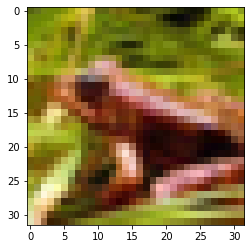

Prediction: frog
Correct answer: frog


In [55]:
## -- random output prediction --

n = np.random.randint(0,high=10000)

x = np.array(X_test[n]/255)
x = x.reshape(-1,32,32,3)

plt.imshow(x[0])
plt.show()

print(f'Prediction: {labels[np.argmax(model.predict(x))]}')
print(f'Correct answer: {labels[y_test[n][0]]}')

In [51]:
model.summary()

Model: "model_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 32, 32, 3)]       0         
                                                                 
 conv1 (Conv2D)              (None, 32, 32, 16)        448       
                                                                 
 conv1a (Conv2D)             (None, 30, 30, 32)        4640      
                                                                 
 pool1 (MaxPooling2D)        (None, 15, 15, 32)        0         
                                                                 
 conv2 (Conv2D)              (None, 15, 15, 32)        9248      
                                                                 
 conv2a (Conv2D)             (None, 13, 13, 64)        18496     
                                                                 
 pool2 (MaxPooling2D)        (None, 6, 6, 64)          0  